In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
class Logistic_Regression:
    def __init__(self,data,r1,r2):
        data=data.sample(frac=1).reset_index(drop=True)

        self.r1=r1
        self.r2=r2
        
        l1=int(self.r1*data.shape[0])
        self.X_train=data.iloc[0:l1,1:].to_numpy()
        self.y_train=data.iloc[0:l1,0].to_numpy()
        self.X_train=self.X_train/255
        
        l2=int((self.r1+self.r2)*data.shape[0])
        self.X_cv=data.iloc[l1:l2,1:].to_numpy()
        self.y_cv=data.iloc[l1:l2,0].to_numpy()
        self.X_cv=self.X_cv/255
        
        self.X_test=data.iloc[l2:,1:].to_numpy()
        self.y_test=data.iloc[l2:,0].to_numpy()
        self.X_test=self.X_test/255
        
        self.W=np.zeros((self.X_train.shape[1],len(np.unique(self.y_train))))
        self.b=np.zeros(len(np.unique(self.y_train)))
        
        self.y_train_encoded=self.one_hot_encoding(self.y_train)
        self.y_cv_encoded=self.one_hot_encoding(self.y_cv)
        self.y_test_encoded=self.one_hot_encoding(self.y_test)

    def one_hot_encoding(self,y):
        num_cat=len(np.unique(y))
        y_new=np.zeros((len(y),num_cat))
        for i in range(len(y)):
            j=int(y[i])
            y_new[i,j]+=1
        return y_new

    def sigmoid(self,z):
        g=1/(1+np.exp(-z))
        return g

    def cost(self,x,y):
        z=np.dot(x,self.W)+self.b
        f_wb=self.sigmoid(z)
        cost=-np.sum(y*np.log(f_wb)+(1-y)*(np.log(1-f_wb)))/(x.shape[0]*10)
        cost+=self.lambda_*np.sum(self.W**2)/(2*x.shape[0]*10)
        return cost

    def compute_gradient(self):
        self.dj_dw=np.zeros((self.X_train.shape[1],10))
        self.dj_db=np.zeros(10)
        y_cap=self.sigmoid(np.dot(self.X_train,self.W)+self.b)
        self.dj_db=np.sum(y_cap-self.y_train_encoded)
        self.dj_dw=np.dot(self.X_train.T,(y_cap-self.y_train_encoded))+(self.lambda_*self.W)
        self.dj_dw=self.dj_dw/self.X_train.shape[0]
        self.dj_db=self.dj_db/self.X_train.shape[0]
        return self.dj_dw,self.dj_db
        
    def gradient_descent(self,alpha,num_iters,lambda_):
        self.J_hist=[]
        self.alpha=alpha
        self.num_iters=num_iters
        self.lambda_=lambda_

        print(f'Initial Cost: {self.cost(self.X_train,self.y_train_encoded)}')
        for i in range(self.num_iters):
            self.dj_dw,self.dj_db=self.compute_gradient()
            self.W=self.W-(self.alpha*self.dj_dw)
            self.b=self.b-(self.alpha*self.dj_db)
            if((i+1)%1000==0):
                print(f'Cost after iteration {i+1}: {self.cost(self.X_train,self.y_train_encoded)}')
            self.J_hist.append(self.cost(self.X_train,self.y_train_encoded))

    def prediction(self,x):
        f_wb=self.sigmoid(np.dot(x,self.W)+self.b)
        y_pred=np.argmax(f_wb,axis=1)
        return y_pred
        
    def confusion_matrix(self,y_pred,y):
        tp=np.sum((y_pred==1)&(y==1))
        tn=np.sum((y_pred==0)&(y==0))
        fp=np.sum((y_pred==1)&(y==0))
        fn=np.sum((y_pred==0)&(y==1))
        cmat=np.array([[tp,fp],[fn,tn]])
        return cmat

    def accuracy_one_hot(self,y_pred,y):
        c=self.confusion_matrix(y_pred,y)
        tp=c[0,0]
        tn=c[1,1]
        fp=c[0,1]
        fn=c[1,0]
        accuracy=(tp+tn)/(tp+tn+fp+fn)
        return accuracy

    def F1_score(self,y_pred,y):
        c=self.confusion_matrix(y_pred,y)
        tp=c[0,0]
        tn=c[1,1]
        fp=c[0,1]
        fn=c[1,0]
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        F1=(2*precision*recall)/(precision+recall)
        return F1

    def accuracy(self,y_pred,y):
        accuracy=np.sum(y_pred==y)/y.shape[0]
        return accuracy

    def plot_cost(self):
        plot_x=np.arange(len(self.J_hist))
        plot_y=np.array(self.J_hist)
        plt.plot(plot_x,plot_y)
        plt.xlabel("No. of iterations")
        plt.ylabel("Cost")

In [3]:
train_data=pd.read_csv('Classification_train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
model=Logistic_Regression(train_data,0.8,0.1)

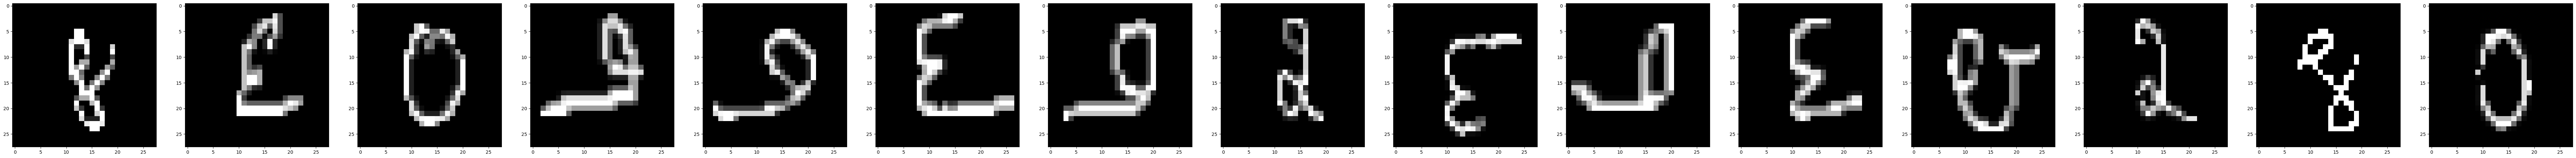

In [5]:
fig,axis=plt.subplots(ncols=15,figsize=(100,10))
for i in range(15):
    image=np.array(model.X_train[i],dtype=float)
    pxl =image.reshape((28, 28))
    axis[i].imshow(pxl, cmap='gray')

In [9]:
model.gradient_descent(2.5,10000,0)

Initial Cost: 0.6931471805599451
Cost after iteration 1000: 0.02638943121222625
Cost after iteration 2000: 0.023722641420889333
Cost after iteration 3000: 0.02233565732217221
Cost after iteration 4000: 0.021418870709822537
Cost after iteration 5000: 0.020741935648590403
Cost after iteration 6000: 0.020209352706117675
Cost after iteration 7000: 0.019773067845601608
Cost after iteration 8000: 0.019405362396587952
Cost after iteration 9000: 0.019088740153499092
Cost after iteration 10000: 0.018811526983160565


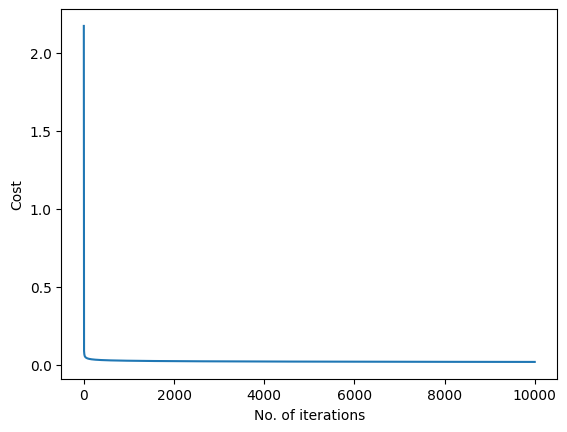

In [119]:
model.plot_cost()

In [10]:
model.ytrain_pred=model.prediction(model.X_train)
model.ycv_pred=model.prediction(model.X_cv)
model.ytest_pred=model.prediction(model.X_test)

In [11]:
print(f'Cost for cross validation dataset: {model.cost(model.X_cv,model.y_cv_encoded)}')

Cost for cross validation dataset: 0.031230490439057606


In [12]:
print(f'Cost for test dataset: {model.cost(model.X_test,model.y_test_encoded)}')

Cost for test dataset: 0.03459944154251434


In [13]:
print(f'Accuracy for training dataset: {model.accuracy(model.ytrain_pred,model.y_train)}')

Accuracy for training dataset: 0.9811666666666666


In [14]:
print(f'Accuracy for cross validation dataset: {model.accuracy(model.ycv_pred,model.y_cv)}')

Accuracy for cross validation dataset: 0.9676666666666667


In [15]:
print(f'Accuracy for test dataset: {model.accuracy(model.ytest_pred,model.y_test)}')

Accuracy for test dataset: 0.963


In [114]:
model1=Logistic_Regression(train_data,0.8,0.1)

In [115]:
model1.gradient_descent(5,1000,0)

Initial Cost: 0.6931471805599451
Cost after iteration 1000: 0.024160023629577476


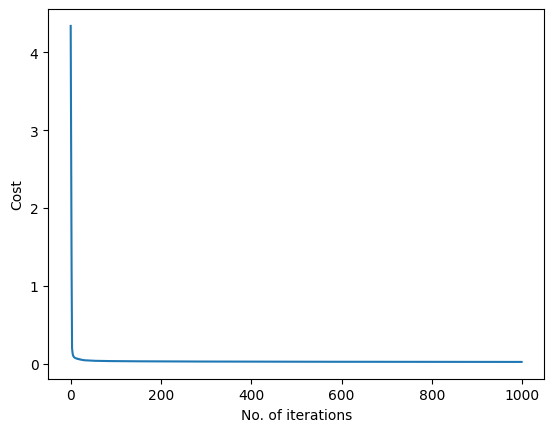

In [120]:
model1.plot_cost()

In [116]:
model1.ytrain_pred=model1.prediction(model1.X_train)
model1.ycv_pred=model1.prediction(model1.X_cv)
model1.ytest_pred=model1.prediction(model1.X_test)

In [117]:
print(f'Accuracy for training dataset: {model1.accuracy(model1.ytrain_pred,model1.y_train)}')

Accuracy for training dataset: 0.9745833333333334


In [118]:
print(f'Accuracy for cross validation dataset: {model1.accuracy(model1.ycv_pred,model1.y_cv)}')

Accuracy for cross validation dataset: 0.9716666666666667


In [121]:
test_data=pd.read_csv('Classification_test.csv')
test_data.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
test_x=test_data.iloc[:,1:].to_numpy()

In [124]:
test_y=model.prediction(test_x/255)

In [128]:
df = pd.DataFrame({'ID': test_data.iloc[:,0], 'label': test_y})
df.to_csv('result_logisitic.csv')